## Importing Libraries and data set

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# To ensure the charts are displayed in the notebook automatically

%matplotlib inline

In [3]:
# Define path

path = r'/Users/vanessanunezpenas/Documents/Data Analysis Projects/Airbnb Berlin Ratings/2. Data'

In [4]:
# Import data

berlin = pd.read_csv(os.path.join(path,'Prepared','airbnb_berlin_clean.csv'))

/tmp/ipykernel_88358/1643394806.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  berlin = pd.read_csv(os.path.join(path,'Prepared','airbnb_berlin_clean.csv'))


## Exploring Relationships: Correlation

In [5]:
berlin.columns

Index(['Review ID', 'Review Date', 'Reviewer ID', 'Listing ID', 'Host ID',
       'Host Since', 'Host Response Time', 'Host Response Rate',
       'Is Superhost', 'Neighborhood Group', 'Postal Code', 'Latitude',
       'Longitude', 'Is Exact Location', 'Property Type', 'Room Type',
       'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Price',
       'Guests Included', 'Min Nights', 'Reviews', 'First Review',
       'Last Review', 'Overall Rating', 'Accuracy Rating',
       'Cleanliness Rating', 'Checkin Rating', 'Communication Rating',
       'Location Rating', 'Value Rating', 'Instant Bookable',
       'Business Travel Ready'],
      dtype='object')

In [6]:
# Create a subset with the columns to explore

sub_berlin = berlin[['Listing ID','Bathrooms', 'Bedrooms', 'Beds', 'Price', 'Reviews', 'Overall Rating', 'Location Rating']]

In [7]:
sub_berlin

,Listing ID,Bathrooms,Bedrooms,Beds,Price,Reviews,Overall Rating,Location Rating
0,10002699,1.0,2.0,2.0,60.0,1,100.0,10.0
1,10006647,1.0,1.0,1.0,35.0,20,92.0,10.0
2,10006647,1.0,1.0,1.0,35.0,20,92.0,10.0
3,10006647,1.0,1.0,1.0,35.0,20,92.0,10.0
4,10006647,1.0,1.0,1.0,35.0,20,92.0,10.0
...,...,...,...,...,...,...,...,...
451595,999465,1.5,4.0,6.0,150.0,4,100.0,10.0
451596,999465,1.5,4.0,6.0,150.0,4,100.0,10.0
451597,9996186,2.0,1.0,1.0,80.0,3,80.0,9.0
451598,9996186,2.0,1.0,1.0,80.0,3,80.0,9.0


In [8]:
# Check for missing values

sub_berlin.isnull().sum()

Listing ID           0
Bathrooms          936
Bedrooms           709
Beds                71
Price                0
Reviews              0
Overall Rating       0
Location Rating      0
dtype: int64

In [9]:
# Exclude rows with NaNs

sub_berlin_clean = sub_berlin[~sub_berlin.isnull().any(axis=1)]

In [10]:
sub_berlin_clean.shape

(449916, 8)

In [11]:
# Checking the number of unique Listing IDs

unique_listing_count = sub_berlin_clean['Listing ID'].nunique()
unique_listing_count

18795

In [12]:
# Checking Duplicates
dups = sub_berlin_clean.duplicated()
dups.sum()

431121

In [13]:
# Dropping duplicate values 

sub_berlin_clean.drop_duplicates(keep='first', inplace=True)

/tmp/ipykernel_88358/448026938.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_berlin_clean.drop_duplicates(keep='first', inplace=True)


In [14]:
sub_berlin_clean.head()

,Listing ID,Bathrooms,Bedrooms,Beds,Price,Reviews,Overall Rating,Location Rating
0,10002699,1.0,2.0,2.0,60.0,1,100.0,10.0
1,10006647,1.0,1.0,1.0,35.0,20,92.0,10.0
21,10006747,1.0,1.0,2.0,30.0,2,90.0,9.0
23,10007526,1.0,1.0,2.0,30.0,3,100.0,9.0
26,10007952,1.0,1.0,1.0,70.0,1,100.0,10.0


In [15]:
sub_berlin_clean.shape

(18795, 8)

Text(0.5, 1.0, 'Overall Rating and Price in Airbnb Berlin')

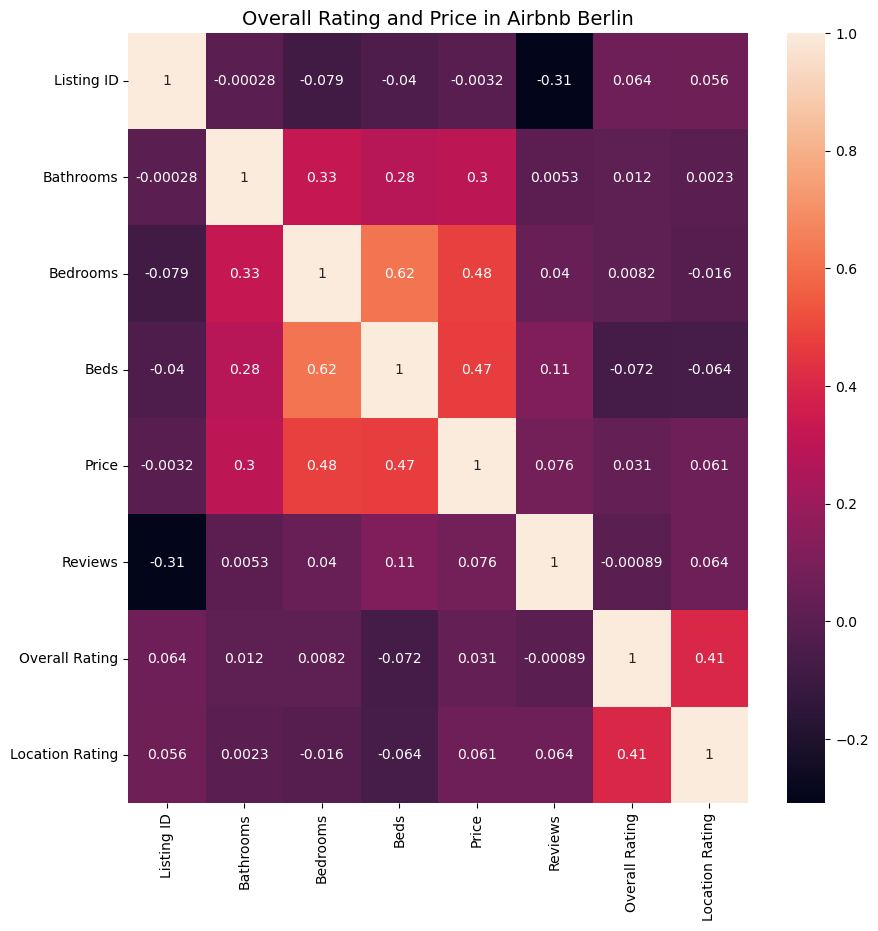

In [16]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub_berlin_clean.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

# Add title to heatmap
plt.title('Overall Rating and Price in Airbnb Berlin', size = 14)

We would like to explore as well the correlation with the location of the listings, but we cannot use string at this point. That's why we have selected only the variables price, overall rating, location and those regarding the characteristics of the listing. 

The coefficients in the plot show a general weak relationships between the variables. 

- There is a moderate correlation between overall rating and location rating because the coefficient is 0.41. However, the location rating and the price has no correlation. 

- There is no correlation between overall rating and the characteristics of the listing because the coefficients are close to 0 too.

- There is a moderate correlation between price and the characteristics of the listing because the coefficients are around 0.3-0.48. The correlation between price and number of bedrooms is the more relevant 

- There is no correlation between overall rating and price because the coefficient is 0.031.

- There is no correlation between overall rating and number of reviews. Neither between price and number of reviews.

## Exploring Relationships: scatterplots

/Users/vanessanunezpenas/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Relationship between Price and Bedrooms')

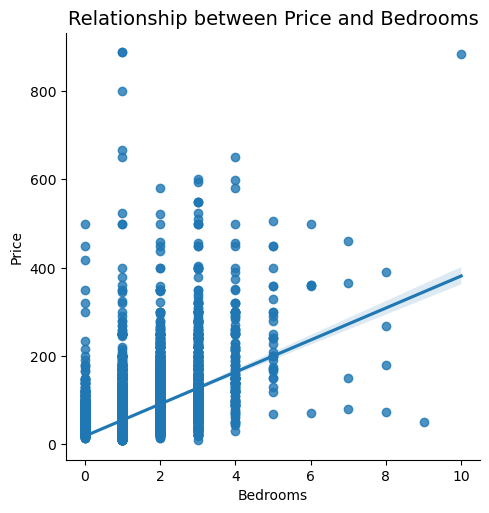

In [17]:
# Scatterplot for the 'Price' and 'Bedrooms' columns in seaborn

sns.lmplot(x = 'Bedrooms', y = 'Price', data = sub_berlin_clean)

# Add title
plt.title('Relationship between Price and Bedrooms', size = 14)

/Users/vanessanunezpenas/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Relationship between Price and Beds')

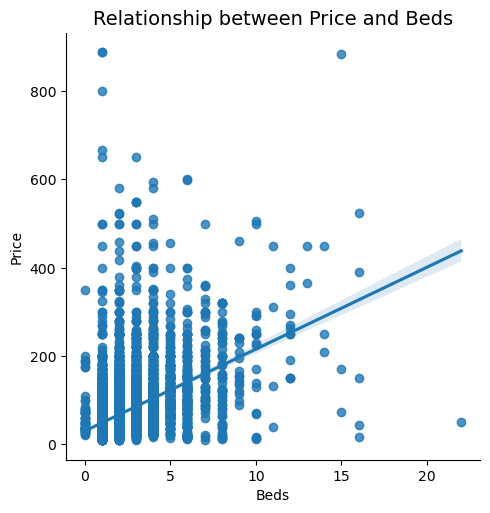

In [18]:
# Scatterplot for the 'Price' and 'Beds' columns in seaborn

sns.lmplot(x = 'Beds', y = 'Price', data = sub_berlin_clean)

# Add title
plt.title('Relationship between Price and Beds', size = 14)

/Users/vanessanunezpenas/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Relationship between Price and Bathrooms')

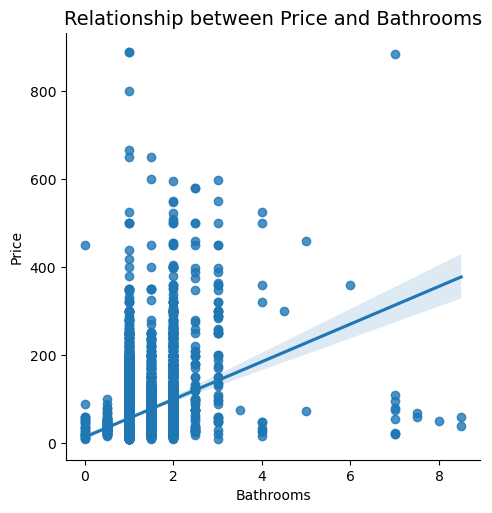

In [19]:
# Scatterplot for the 'Price' and 'Bathrooms' columns in seaborn

sns.lmplot(x = 'Bathrooms', y = 'Price', data = sub_berlin_clean)

# Add title
plt.title('Relationship between Price and Bathrooms', size = 14)

The scatterplots for the variables with the strongest correlations show a linear trend, but the outliers in the price column, the most expensive listings, are not implicitly those with more bedrooms, beds or bathrooms.

/Users/vanessanunezpenas/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Relationship between Price and Location Rating')

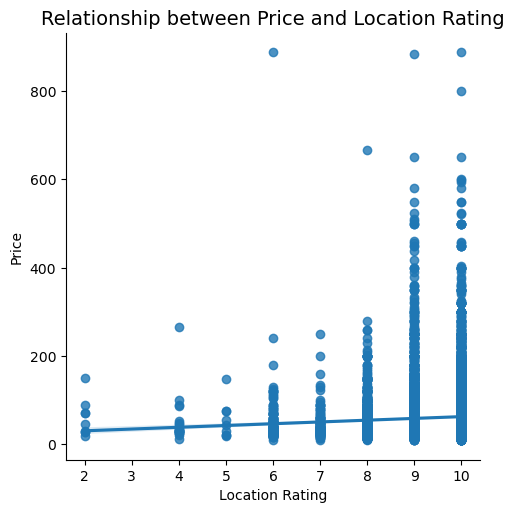

In [20]:
# Scatterplot for the 'Price' and 'Location Rating' columns in seaborn

sns.lmplot(x = 'Location Rating', y = 'Price', data = sub_berlin_clean)

# Add title
plt.title('Relationship between Price and Location Rating', size = 14)

This scatterplot shows as well a linear trend, but this time we can see how the price of the listings increase hesitantly with higher location rating. The relationship between these two variable is very week.

/Users/vanessanunezpenas/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Relationship between Overall and Location Rating')

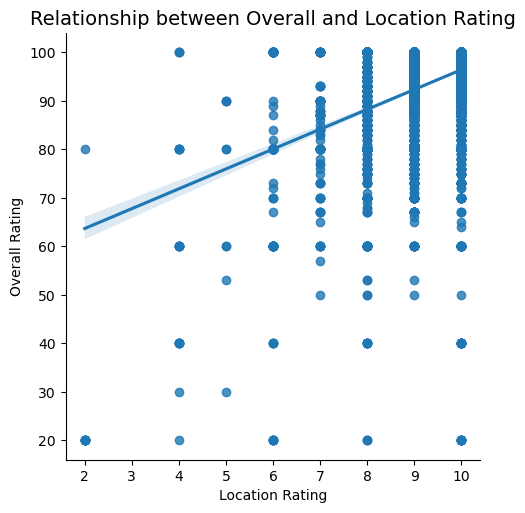

In [21]:
# Scatterplot for the 'Overall Rating' and 'Location Rating' columns in seaborn

sns.lmplot(x = 'Location Rating', y = 'Overall Rating', data = sub_berlin_clean)

# Add title
plt.title('Relationship between Overall and Location Rating', size = 14)

Here we can see a more relevant relatioship, so the location of the listings influences the overall rating.

## Exploring Relationships: Pair plot

In [22]:
# Keeping only the variableswe want to use in the pair plot

sub_berlin2 = sub_berlin_clean[['Overall Rating', 'Location Rating', 'Reviews', 'Price']]

/Users/vanessanunezpenas/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


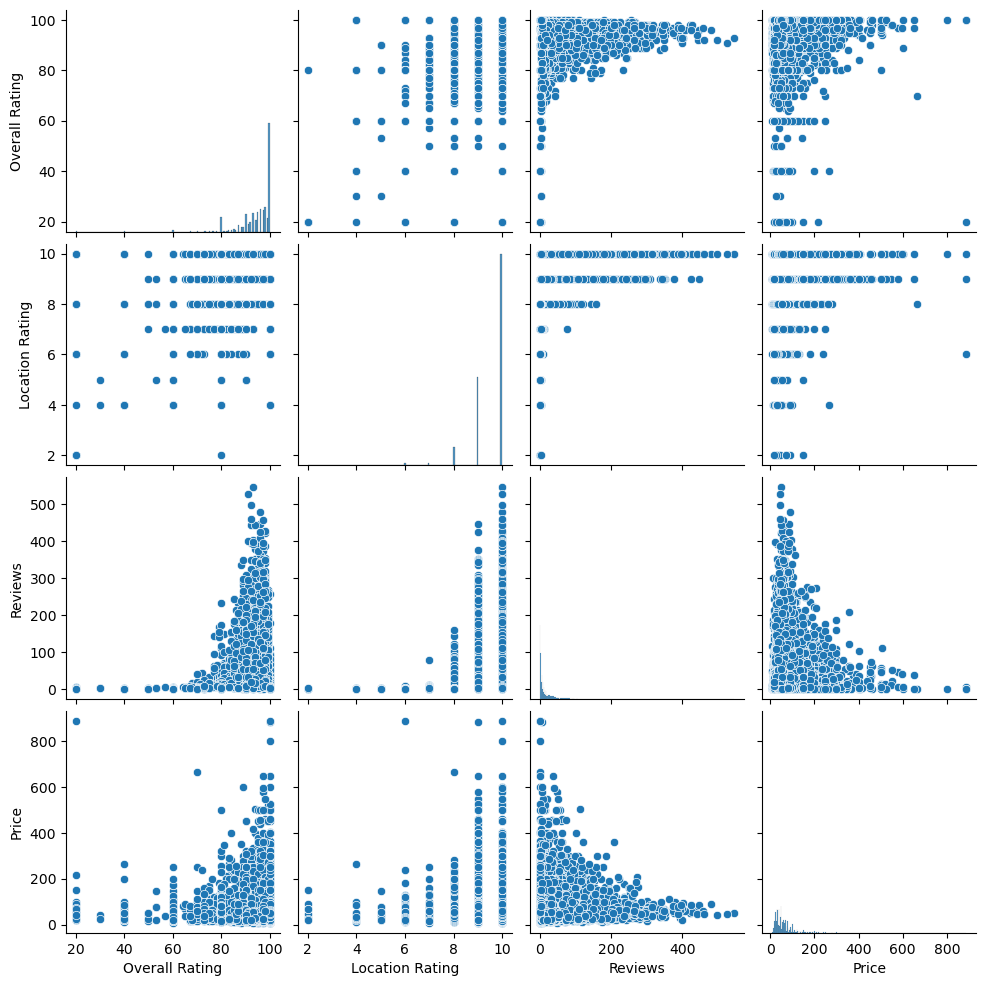

In [23]:
pair_plot = sns.pairplot(sub_berlin2)

Having all this information at-a-glance, we can see how most of the listings are under 400 € and good reviewed, between 80-100%. The most expensive listings are not the best reviewed. Actually, the listing with the higher price has a bad overall rating. 

Listings with more reviews have neither automatically the best overall rating. The number of reviews is higher in cheaper listings, probably because they get more reservations. 

Something interesting that we can get from the correlation between reviews and overall rating is that customers write more reviews to show their satisfaction than to complain. 

A high location rating doesn't mean automatically higher prices, but the more expensime listings have generally better location rating. 

We need to look further what are the reason behind the overall rating and the difference prices. 

## Exploring Relationships: Categorical plot

<Axes: xlabel='Overall Rating', ylabel='Count'>

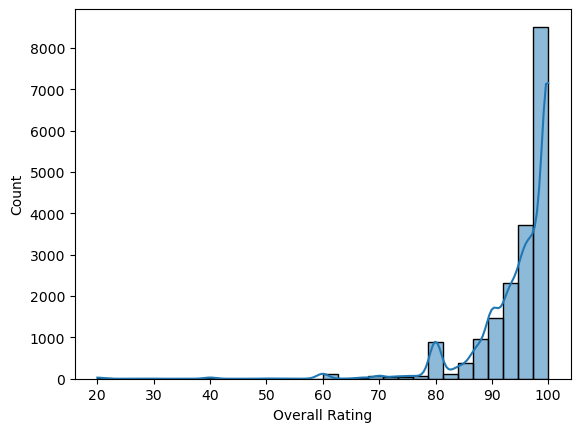

In [24]:
sns.histplot(sub_berlin_clean['Overall Rating'], bins = 30, kde = True)

In [25]:
sub_berlin_clean.loc[sub_berlin_clean['Overall Rating'] <= 50, 'Rating Category'] = 'Low Rating'

/tmp/ipykernel_88358/1075063309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_berlin_clean.loc[sub_berlin_clean['Overall Rating'] <= 50, 'Rating Category'] = 'Low Rating'


In [26]:
sub_berlin_clean.loc[(sub_berlin_clean['Overall Rating'] > 50) & (sub_berlin_clean['Overall Rating'] < 80), 'Rating Category'] = 'Middle Rating'

In [27]:
sub_berlin_clean.loc[(sub_berlin_clean['Overall Rating'] >= 80) & (sub_berlin_clean['Overall Rating'] < 100), 'Rating Category'] = 'High Rating'

In [28]:
sub_berlin_clean.loc[sub_berlin_clean['Overall Rating'] == 100, 'Rating Category'] = 'Excellent Rating'

In [29]:
sub_berlin_clean['Rating Category'].value_counts(dropna=False)

Rating Category
High Rating         12023
Excellent Rating     6318
Middle Rating         393
Low Rating             61
Name: count, dtype: int64

In [30]:
# Defining price ranges for a better visualization

sub_berlin_clean.loc[sub_berlin_clean['Price'] < 100, 'Price Range'] = '0 - 100'

/tmp/ipykernel_88358/135951970.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_berlin_clean.loc[sub_berlin_clean['Price'] < 100, 'Price Range'] = '0 - 100'


In [31]:
sub_berlin_clean.loc[(sub_berlin_clean['Price'] >= 100) & (sub_berlin_clean['Price'] < 200), 'Price Range'] = '100 - 199'

In [32]:
sub_berlin_clean.loc[(sub_berlin_clean['Price'] >= 200) & (sub_berlin_clean['Price'] < 300), 'Price Range'] = '200 - 299'

In [33]:
sub_berlin_clean.loc[(sub_berlin_clean['Price'] >= 300) & (sub_berlin_clean['Price'] < 400), 'Price Range'] = '300 - 399'

In [34]:
sub_berlin_clean.loc[(sub_berlin_clean['Price'] >= 400) & (sub_berlin_clean['Price'] < 500), 'Price Range'] = '400 - 499'

In [35]:
sub_berlin_clean.loc[(sub_berlin_clean['Price'] >= 500) & (sub_berlin_clean['Price'] < 600), 'Price Range'] = '500 - 599'

In [36]:
sub_berlin_clean.loc[(sub_berlin_clean['Price'] >= 600) & (sub_berlin_clean['Price'] < 700), 'Price Range'] = '600 - 699'

In [37]:
sub_berlin_clean.loc[(sub_berlin_clean['Price'] >= 700) & (sub_berlin_clean['Price'] < 800), 'Price Range'] = '700 - 799'

In [38]:
sub_berlin_clean.loc[(sub_berlin_clean['Price'] >= 800) & (sub_berlin_clean['Price'] < 900), 'Price Range'] = '800 - 899'

In [39]:
sub_berlin_clean.loc[(sub_berlin_clean['Price'] >= 900) & (sub_berlin_clean['Price'] <= 1000), 'Price Range'] = '900 - 1000'

In [40]:
sub_berlin_clean['Price Range'].value_counts(dropna=False)

Price Range
0 - 100      16504
100 - 199     1877
200 - 299      294
300 - 399       69
400 - 499       22
500 - 599       21
800 - 899        4
600 - 699        4
Name: count, dtype: int64

In [41]:
# Defining the price range categories
price_range_order = ['0 - 100', '100 - 199', '200 - 299', '300 - 399', '400 - 499', '500 - 599', '600 - 699']

In [42]:
# Converting the 'Price Range' to categorical data type with the desired order
sub_berlin_clean['Price Range'] = pd.Categorical(sub_berlin_clean['Price Range'], categories=price_range_order, ordered=True)

/tmp/ipykernel_88358/3613497476.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_berlin_clean['Price Range'] = pd.Categorical(sub_berlin_clean['Price Range'], categories=price_range_order, ordered=True)


/Users/vanessanunezpenas/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, '0 - 100'),
  Text(1, 0, '100 - 199'),
  Text(2, 0, '200 - 299'),
  Text(3, 0, '300 - 399'),
  Text(4, 0, '400 - 499'),
  Text(5, 0, '500 - 599'),
  Text(6, 0, '600 - 699')])

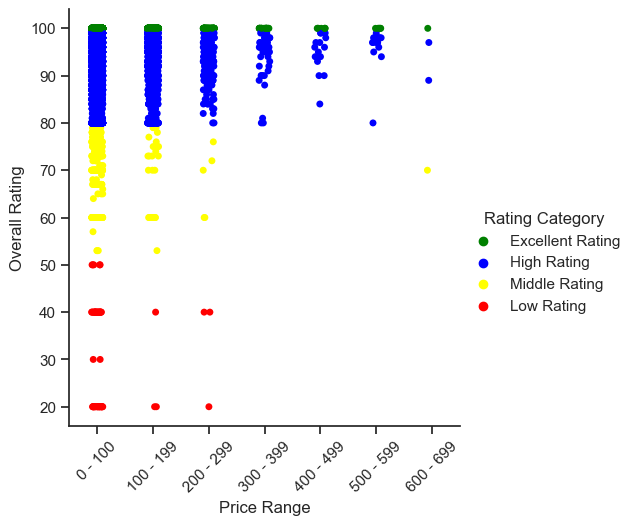

In [43]:
# Create a categorical plot in seaborn using the rating categories created above

sns.set(style="ticks")
categorical_plot = sns.catplot(x="Price Range", y="Overall Rating", hue="Rating Category", data=sub_berlin_clean, palette=['green','blue','yellow','red'])
plt.xticks(rotation=45) # To rotate x-axis labels

The categorical plot gives us a better image of the correlation between overall rating and price: with only one exception, there are no low or middle-rating listings above the 300 range. 

## Research Questions

### Existing research questions:

The exploratory visual analysis has helped us to answer some of our research questions:

-	Is there any correlation between location and overall rating?

We need to analyse further with exact location, but customers don't give the same review in overall rating and location rating, so they may consider other features as well.  
    
-	Is there any correlation between location and prize? 

It is hard to say it only with the location rating, we need to analyze further with exact location. 

- Is there any correlation between the characteristics of the listing (number of beds, bathrooms, etc) and the overall rating?

 No, there is not. 
    
-	Is there any correlation between the characteristics of the listing (number of beds, bathrooms, etc) and the price?

Yes, there is a moderate correlation, especially between price and number of bedrooms. However, the more expensive listings are not those with a higher number of facilities. 

-	Is there any correlation between overall rating and price?
    
There is no correlation either, but the most expensive listings have generally very good reviews. 

-	Is there any correlation between the number of reviews and the overall rating?
    
No, but we have discovered that customers write more reviews to show their satisfaction than to complain.

### Further research questions:

- What does influence in the overall rating of the listings?
- What features influence the price the most?

## Exporting the subset

In [44]:
sub_berlin_clean.to_csv(os.path.join(path, 'Prepared', 'airbnb_berlin_attributes.csv'), index = False)